In [1]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [24]:
ini_condns = np.array([np.random.uniform(-1,1,20000),np.random.uniform(-2,2,20000)]).T

In [25]:
ini_condns_arr = ini_condns.flatten()

In [26]:
def fun(t, y):
    res = np.zeros(len(y))
    for i in range(len(y)):
        if i % 2 == 0:
            res[i] = y[i+1]
        else:
            res[i] = - y[i-1]
    return res

def fun_d(t, y):
    res = np.zeros(len(y))
    for i in range(len(y)):
        if i % 2 == 0:
            res[i] = y[i+1]
        else:
            res[i] = - y[i-1] - y[i-1] ** 3
    return res

In [27]:
soln = solve_ivp(fun, [0,100], ini_condns_arr)

11.937828398135714
11.936357659107143
11.93484568202985
11.933343418468693
11.931842997474195
11.930343786564547
11.928845485861551
11.927347855466348
11.925850414579443


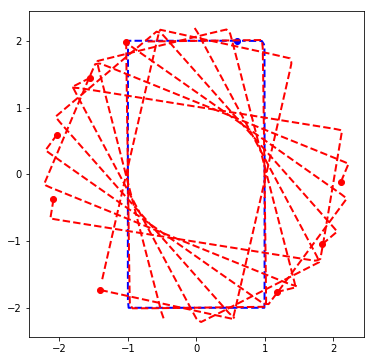

In [28]:
plt.figure(figsize=(6,6))
points = ini_condns
#plt.plot(ini_condns[:,0],ini_condns[:,1], '.')
hull = ConvexHull(ini_condns,incremental=True)
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'b--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'bo')
print(hull.area)

for n in [10,20,30,40,50,60,70,80]:
    points_1 = np.reshape(soln.y[:,n], newshape=(len(ini_condns/2), 2))
    #plt.plot(points_1[:,0],points_1[:,1],'.')
    hull_1 = ConvexHull(points_1,incremental=True)
    plt.plot(points_1[hull_1.vertices,0], points_1[hull_1.vertices,1], 'r--', lw=2)
    plt.plot(points_1[hull_1.vertices[0],0], points_1[hull_1.vertices[0],1], 'ro')
    print(hull_1.area)


In [41]:
soln = solve_ivp(fun_d, [0,100], ini_condns_arr, t_eval = np.linspace(0,100,10))

KeyboardInterrupt: 

In [40]:
print(soln.t)

[ 0.          0.03575615  0.39331765  0.96530352  1.55982839  2.15435326
  2.78346077  3.41256828  4.04167579  4.67370054  5.30902935  5.94435816
  6.57968697  7.21979242  7.85989788  8.50000333  9.14010878  9.78021423
 10.42031969 11.06042514 11.11111111]


11.937828398135714
11.303281281339865
11.630574808884274


IndexError: index 30 is out of bounds for axis 1 with size 21

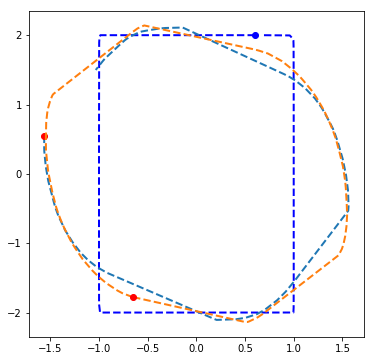

In [34]:
plt.figure(figsize=(6,6))
points = ini_condns
#plt.plot(ini_condns[:,0],ini_condns[:,1], '.')
hull = ConvexHull(ini_condns,incremental=True)
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'b--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'bo')
print(hull.area)

print soln.

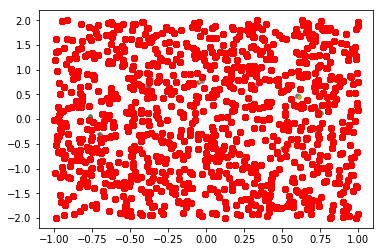

In [137]:
for l in soln.y.T:
    plt.plot(l[0],l[1],'.')
    plt.plot(ini_condns[:,0],ini_condns[:,1],'ro')

[ 7.34804330e-01 -5.25650501e-01  2.06279677e-01 -7.00568097e-01
 -1.92231789e-01  4.91247848e-01 -4.58244551e-01 -5.56315741e-01
 -4.97493580e-01  7.93750806e-01  5.32385453e-01 -3.39486529e-01
  5.78935258e-01  1.29481264e+00  1.45436433e-01  5.91473542e-01
 -1.57585467e+00  2.49379411e-01  1.17156724e-01 -1.74468649e-01
  1.00645785e+00  7.27939788e-01  3.53122158e-01  6.65083351e-02
  7.20471356e-01  2.72265840e-01 -4.30572835e-01 -1.49749361e-02
  1.73414522e-01 -7.55311012e-02 -1.00640046e+00 -2.71198698e-01
 -1.51139744e-01  5.43317574e-01  2.52505491e-01 -1.46659566e+00
 -1.34809082e+00  4.20400875e-01  1.87178883e-02  2.51861144e-02
  3.38128479e-02 -1.15880967e+00  1.29826119e-01 -6.49742743e-01
  1.46137102e+00  6.26873916e-02 -1.23700589e+00 -5.37402988e-01
  1.09803918e-02  1.04459365e-01 -8.52054693e-01  7.42533294e-01
  1.36007571e-01 -1.02939445e-01 -7.25271712e-01 -1.24182844e+00
 -1.06846192e-01 -4.20040707e-01  1.66840890e+00  4.57627840e-01
  9.41840883e-01  3.08722

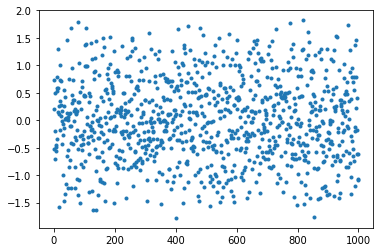